In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import tensorflow as tf
import os
import glob 
from glob import iglob
from collections import Counter
import cv2 as cv
import splitfolders
from keras.models import Model , Sequential
from keras.layers import Dense , Flatten , Conv2D , MaxPooling2D
from keras.layers.normalization import batch_normalization
from keras.applications.resnet import ResNet50
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
import xgboost as XGB
from sklearn.metrics import classification_report , confusion_matrix , ConfusionMatrixDisplay , accuracy_score
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from keras.applications.resnet import preprocess_input
SIZE = 224
CHANNELS = 3

In [2]:
train_data = 'C:/Dataset/splitted_images2/train'
valid_data =  'C:/Dataset/splitted_images2/val'

In [3]:
#Capture training data and labels into respective lists
train_images = []
train_labels = [] 

for directory_path in glob.glob("C:/Dataset/splitted_images2/train/*"):
    label = directory_path.split("\\")[-1]
    print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.png")):
        print(img_path)
        img = cv.imread(img_path, cv.IMREAD_COLOR)       
        img = cv.resize(img, (SIZE, SIZE))
        img = cv.cvtColor(img, cv.COLOR_RGB2BGR)
        train_images.append(img)
        train_labels.append(label)

Chickenpox
C:/Dataset/splitted_images2/train\Chickenpox\chickenpox1.png
C:/Dataset/splitted_images2/train\Chickenpox\chickenpox10.png
C:/Dataset/splitted_images2/train\Chickenpox\chickenpox100.png
C:/Dataset/splitted_images2/train\Chickenpox\chickenpox101.png
C:/Dataset/splitted_images2/train\Chickenpox\chickenpox102.png
C:/Dataset/splitted_images2/train\Chickenpox\chickenpox103.png
C:/Dataset/splitted_images2/train\Chickenpox\chickenpox104.png
C:/Dataset/splitted_images2/train\Chickenpox\chickenpox105.png
C:/Dataset/splitted_images2/train\Chickenpox\chickenpox106.png
C:/Dataset/splitted_images2/train\Chickenpox\chickenpox107.png
C:/Dataset/splitted_images2/train\Chickenpox\chickenpox11.png
C:/Dataset/splitted_images2/train\Chickenpox\chickenpox12.png
C:/Dataset/splitted_images2/train\Chickenpox\chickenpox13.png
C:/Dataset/splitted_images2/train\Chickenpox\chickenpox15.png
C:/Dataset/splitted_images2/train\Chickenpox\chickenpox16.png
C:/Dataset/splitted_images2/train\Chickenpox\chicken

C:/Dataset/splitted_images2/train\Monkeypox\monkeypox80.png
C:/Dataset/splitted_images2/train\Monkeypox\monkeypox81.png
C:/Dataset/splitted_images2/train\Monkeypox\monkeypox82.png
C:/Dataset/splitted_images2/train\Monkeypox\monkeypox85.png
C:/Dataset/splitted_images2/train\Monkeypox\monkeypox86.png
C:/Dataset/splitted_images2/train\Monkeypox\monkeypox88.png
C:/Dataset/splitted_images2/train\Monkeypox\monkeypox90.png
C:/Dataset/splitted_images2/train\Monkeypox\monkeypox91.png
C:/Dataset/splitted_images2/train\Monkeypox\monkeypox92.png
C:/Dataset/splitted_images2/train\Monkeypox\monkeypox93.png
C:/Dataset/splitted_images2/train\Monkeypox\monkeypox94.png
C:/Dataset/splitted_images2/train\Monkeypox\monkeypox95.png
C:/Dataset/splitted_images2/train\Monkeypox\monkeypox97.png
C:/Dataset/splitted_images2/train\Monkeypox\monkeypox98.png
C:/Dataset/splitted_images2/train\Monkeypox\monkeypox99.png
Normal
C:/Dataset/splitted_images2/train\Normal\normal1.png
C:/Dataset/splitted_images2/train\Normal

In [4]:
train_images = np.array(train_images)
train_labels = np.array(train_labels)

In [5]:
test_images = []
test_labels = [] 
for directory_path in glob.glob("C:/Dataset/splitted_images2/val/*"):
    label2 = directory_path.split("\\")[-1]
    #print(label2)
    for img_path in glob.glob(os.path.join(directory_path, "*.png")):
        img = cv.imread(img_path, cv.IMREAD_COLOR)
        img = cv.resize(img, (SIZE, SIZE))
        img = cv.cvtColor(img, cv.COLOR_RGB2BGR)
        test_images.append(img)
        test_labels.append(label2)

In [6]:
## Convert lists to arrays                
test_images = np.array(test_images)
test_labels = np.array(test_labels)

In [7]:
print(test_images.shape)
print(test_labels.shape)

(63, 224, 224, 3)
(63,)


In [8]:
le = LabelEncoder()
test_labels_encoded= le.fit_transform(test_labels)
train_labels_encoded= le.fit_transform(train_labels)

In [9]:
X_train , y_train , X_test , y_test = train_images, train_labels_encoded, test_images, test_labels_encoded

In [10]:
X_train = np.array(X_train)
X_test = np.array(X_test)

In [11]:
X_train , X_test = X_train / 255.0 , X_test / 255.0

In [12]:
print(X_train.dtype)
print(X_test.dtype)

float64
float64


In [13]:
#y_train_oneHot_encoder = to_categorical(y_train).astype('float64')
#y_test_oneHot_encoder = to_categorical(y_test).astype('float64')

In [14]:
X_test.shape

(63, 224, 224, 3)

In [15]:
cnn_resnet = ResNet50(include_top=False , weights='imagenet', input_shape= (SIZE,SIZE,3)  )

In [16]:
for layer in cnn_resnet.layers:
	layer.trainable = False    
cnn_resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

In [17]:
feature_learning = cnn_resnet.predict(X_train)

8/8 [==============================] - 9s 1s/step


In [18]:
features = feature_learning.reshape(feature_learning.shape[0], -1)
#print(features.shape)
X_for_training = features

In [19]:
xgb_model = XGB.XGBClassifier(tree_method='gpu_hist', gpu_id=0)
xgb_model.fit(X_for_training, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=0,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', ...)

In [21]:
#Send test data through same feature extractor process
X_test_feature = cnn_resnet.predict(X_test)
X_test_features = X_test_feature.reshape(X_test_feature.shape[0], -1)

2/2 [==============================] - 2s 1s/step


In [22]:
X_test_features.shape

(63, 100352)

In [23]:

predictions = xgb_model.predict(X_test_features)

predictions = le.inverse_transform(predictions)

In [24]:
predictions

array(['Monkeypox', 'Normal', 'Chickenpox', 'Chickenpox', 'Chickenpox',
       'Chickenpox', 'Chickenpox', 'Chickenpox', 'Monkeypox',
       'Chickenpox', 'Normal', 'Chickenpox', 'Monkeypox', 'Normal',
       'Chickenpox', 'Monkeypox', 'Chickenpox', 'Normal', 'Chickenpox',
       'Chickenpox', 'Monkeypox', 'Normal', 'Normal', 'Normal',
       'Monkeypox', 'Chickenpox', 'Monkeypox', 'Monkeypox', 'Monkeypox',
       'Normal', 'Monkeypox', 'Chickenpox', 'Normal', 'Monkeypox',
       'Chickenpox', 'Monkeypox', 'Monkeypox', 'Chickenpox', 'Monkeypox',
       'Monkeypox', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Monkeypox', 'Normal', 'Normal', 'Normal', 'Normal',
       'Monkeypox', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal'],
      dtype='<U10')

In [25]:
print("Accuracy =", accuracy_score(test_labels , predictions ))

Accuracy = 0.6507936507936508


In [27]:
conf_ma = confusion_matrix(test_labels ,predictions)

<AxesSubplot:>

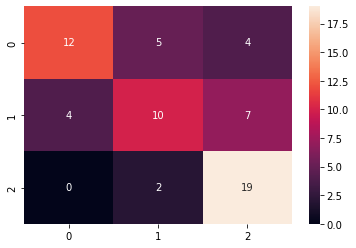

In [28]:
sns.heatmap(conf_ma , annot = True)

1/1 [==============================] - 0s 86ms/step
The prediction for this image is:  ['Monkeypox']
The actual label for this image is:  Monkeypox


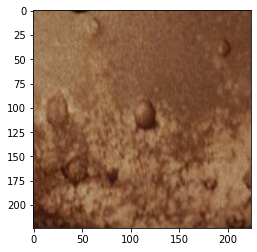

In [33]:
#Check results on a few select images
n=np.random.randint(0, X_test.shape[0])
img = X_test[n]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
input_img_feature=cnn_resnet.predict(input_img)
input_img_features=input_img_feature.reshape(input_img_feature.shape[0], -1)
prediction = xgb_model.predict(input_img_features)[0] 
prediction = le.inverse_transform([prediction])  #Reverse the label encoder to original name
print("The prediction for this image is: ", prediction)
print("The actual label for this image is: ", test_labels[n])



In [35]:
print(classification_report(test_labels , predictions))

              precision    recall  f1-score   support

  Chickenpox       0.75      0.57      0.65        21
   Monkeypox       0.59      0.48      0.53        21
      Normal       0.63      0.90      0.75        21

    accuracy                           0.65        63
   macro avg       0.66      0.65      0.64        63
weighted avg       0.66      0.65      0.64        63



(9483264,)